In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./2021Survey.csv')
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#remove all commas
data = data.replace(',',"",regex=True)

#convert all columns to nurmeric
c = data.select_dtypes(object).columns
data[c] = data[c].apply(pd.to_numeric,errors='coerce')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [4]:
#Show Key Statistics
data2.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
#Create Standard Model

#Define x and y variable
x = data2.drop('B2.1.4  Total Provincial Operating Funding',axis=1).to_numpy()
y = data2['B2.1.4  Total Provincial Operating Funding'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Script for Regression Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn import metrics


for name,method in [('Decision Tree', DecisionTreeRegressor(random_state=100)),
                   ('Random Forest',RandomForestRegressor(n_estimators=100,random_state=100)),
                   ('Extra Trees',ExtraTreesRegressor(n_estimators=100,random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

    print('\nModel - Original')
    print('\nMethod: {}'.format(name))   

    #MAE,MSE and RMSE

    print('R2: {:.2f}'.format(metrics.r2_score(y_test, predict)))
    adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
    print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))
    print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
    print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
    print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Model - Original

Method: Decision Tree
R2: 0.64
Adj_R2: 0.47
Mean Absolute Error: 2.83
Mean Squared Error: 9.50
Root Mean Squared Error: 3.08

Model - Original

Method: Random Forest
R2: 0.97
Adj_R2: 0.96
Mean Absolute Error: 0.75
Mean Squared Error: 0.79
Root Mean Squared Error: 0.89

Model - Original

Method: Extra Trees
R2: 0.94
Adj_R2: 0.91
Mean Absolute Error: 0.95
Mean Squared Error: 1.57
Root Mean Squared Error: 1.25


In [6]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_dt = Pipeline([('scl', StandardScaler()),
                     ('clf', DecisionTreeRegressor(random_state=100))])

pipeline.insert(0,pipe_dt)

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestRegressor(random_state=100))])
pipeline.insert(1,pipe_rdf)

pipe_et = Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesRegressor(random_state=100))])
pipeline.insert(2,pipe_et)

# Set grid search params 

modelpara =[]

max_depth = range(1,100)
param_griddt = {'clf__criterion':['squared_error'],
                'clf__max_depth':max_depth}
modelpara.insert(0,param_griddt)

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__bootstrap': [True, False]}
modelpara.insert(1,param_gridrdf)

param_gridet = {
            'clf__n_estimators': [100,150,200],
            'clf__bootstrap': [True, False]}
modelpara.insert(2,param_gridet)

In [7]:
#Create Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_root_mean_squared_error',
                                                            cv=10,random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='upper right')
    plt.ylim([-1,10])
    plt.show()

Regression Tree - Learning Curve


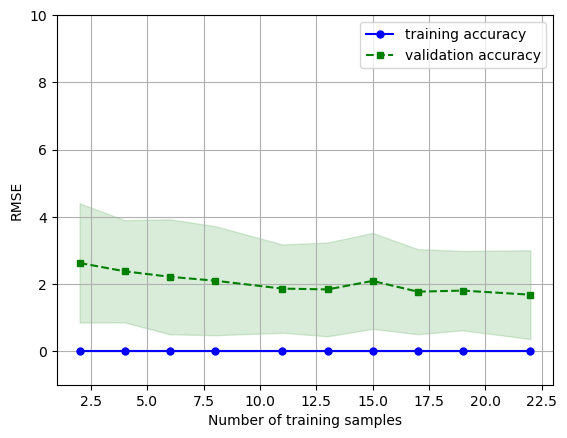


Random Forest - Regression - Learning Curve


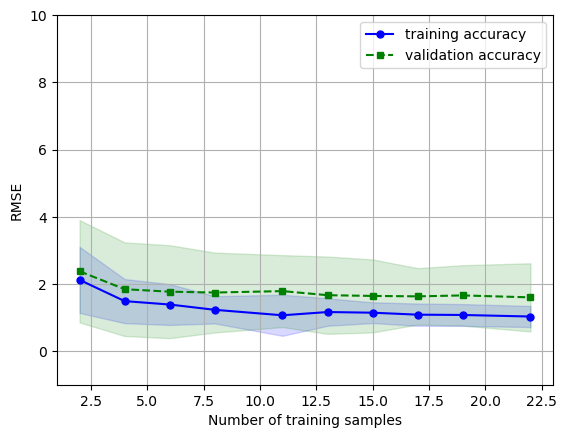


Extra Trees - Regression - Learning Curve


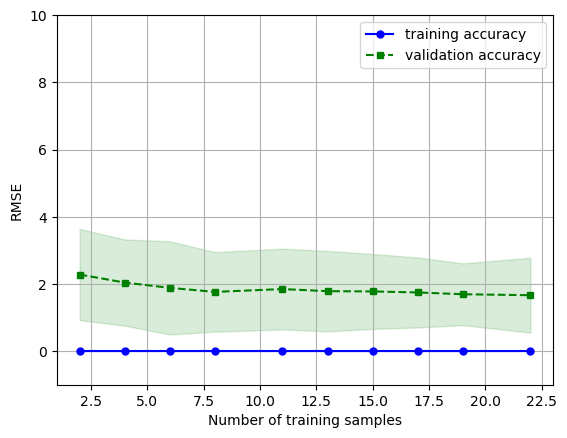

In [8]:
#Plot Learning Curve
print('Regression Tree - Learning Curve')
plot_learning_curves(pipe_dt)
print('\nRandom Forest - Regression - Learning Curve')
plot_learning_curves(pipe_rdf)
print('\nExtra Trees - Regression - Learning Curve')
plot_learning_curves(pipe_et)

Model Evaluation - RMSE
Decision Tree 1.69
Random Forest 1.61
Extra Trees 1.64




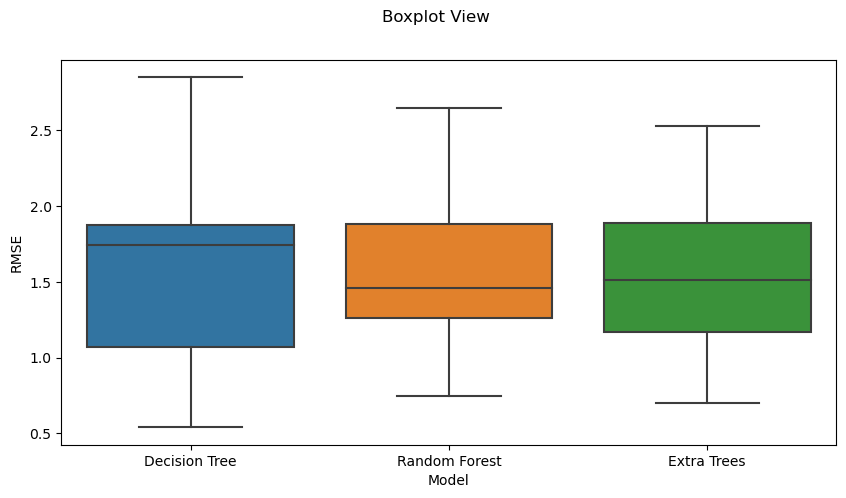

In [9]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Decision Tree',pipe_dt))
models.append(('Random Forest',pipe_rdf))
models.append(('Extra Trees',pipe_et))

#Model Evaluation
results =[]
names=[]
scoring ='neg_root_mean_squared_error'
print('Model Evaluation - RMSE')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train,y_train,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [10]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params,cv=cv2,scoring='neg_root_mean_squared_error')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Feature Importance - optimized
    print('\nFeature Importances')
    for name, score in zip(list(data2.drop('B2.1.4  Total Provincial Operating Funding',axis=1)),
                           gs_clf.best_estimator_.named_steps['clf'].feature_importances_):
        print(name, round(score,2))
    
    #Print MSE and RMSE
    print('\nR2: {:.2f}'.format(metrics.r2_score(y_test, y_pred)))
    adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1)
    print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))
    print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
    print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 

In [11]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: DecisionTreeRegressor(random_state=100)

Best Parameters: {'clf__criterion': 'squared_error', 'clf__max_depth': 5}

Feature Importances
cyl 0.0
disp 0.24
hp 0.74
drat 0.0
wt 0.0
qsec 0.01
vs 0.0
am 0.0
gear 0.0
carb 0.0

R2: 0.70
Adj_R2: 0.56
Mean Absolute Error: 2.56
Mean Squared Error: 7.85
Root Mean Squared Error: 2.80

Optimized Model

Model Name: RandomForestRegressor(random_state=100)

Best Parameters: {'clf__bootstrap': True, 'clf__n_estimators': 200}

Feature Importances
cyl 0.05
disp 0.28
hp 0.27
drat 0.03
wt 0.31
qsec 0.03
vs 0.01
am 0.01
gear 0.0
carb 0.01

R2: 0.97
Adj_R2: 0.96
Mean Absolute Error: 0.73
Mean Squared Error: 0.69
Root Mean Squared Error: 0.83

Optimized Model

Model Name: ExtraTreesRegressor(random_state=100)

Best Parameters: {'clf__bootstrap': False, 'clf__n_estimators': 150}

Feature Importances
cyl 0.5
disp 0.17
hp 0.11
drat 0.01
wt 0.13
qsec 0.03
vs 0.01
am 0.0
gear 0.01
carb 0.02

R2: 0.94
Adj_R2: 0.91
Mean Absolute Error: 